In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('Advertising.csv')

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']

In [6]:
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


<Axes: xlabel='total_spend', ylabel='sales'>

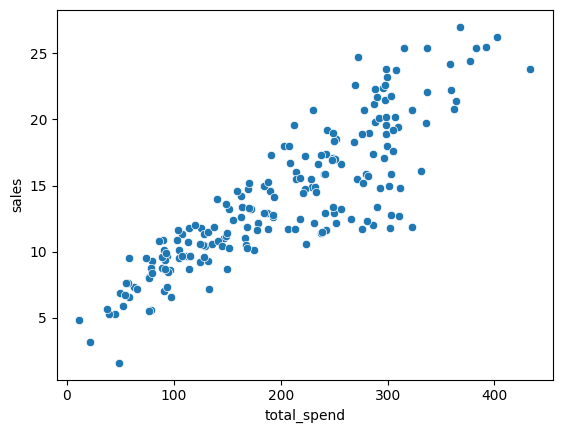

In [7]:
sns.scatterplot(data=df, x='total_spend', y='sales')

<Axes: xlabel='total_spend', ylabel='sales'>

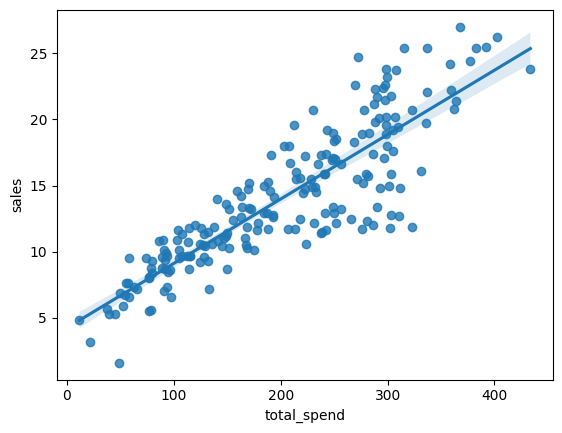

In [8]:
sns.regplot(data=df, x='total_spend', y='sales')

In [9]:
X = df['total_spend']
y = df['sales']



In [10]:
np.polyfit(X, y, deg=1)

array([0.04868788, 4.24302822])

In [11]:
potential_spend = np.linspace(0, 500, 100)

In [12]:
predicted_sales = 0.04868788*potential_spend + 4.24302822

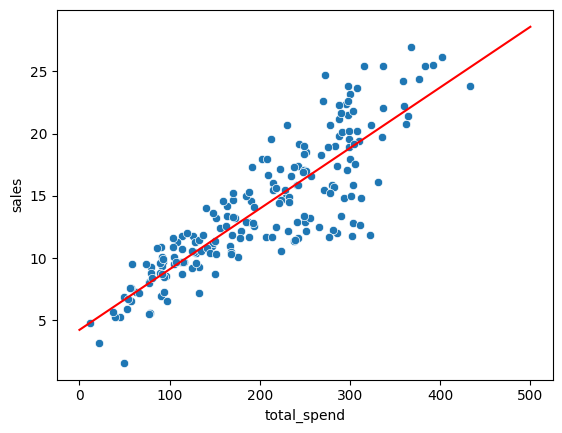

In [13]:
sns.scatterplot(data=df, x='total_spend', y='sales')
plt.plot(potential_spend,predicted_sales, color='red')

In [14]:
spend = 200
predicted_sales = 0.04868788*spend + 4.24302822
predicted_sales


13.98060422

In [15]:
np.polyfit(X, y,3)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [16]:
pot_spend = np.linspace(0, 500, 100)

In [17]:
pred_sales = 3.07615033e-07*pot_spend**3 -1.89392449e-04*pot_spend**2 + 8.20886302e-02*pot_spend + 2.70495053

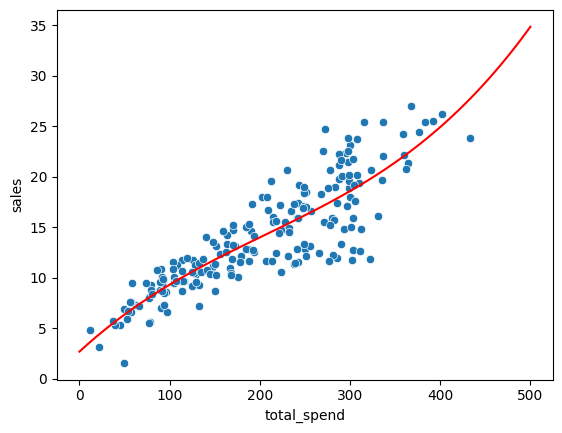

In [18]:

sns.scatterplot(data=df, x='total_spend', y='sales')
plt.plot(pot_spend,pred_sales, color='red')

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------

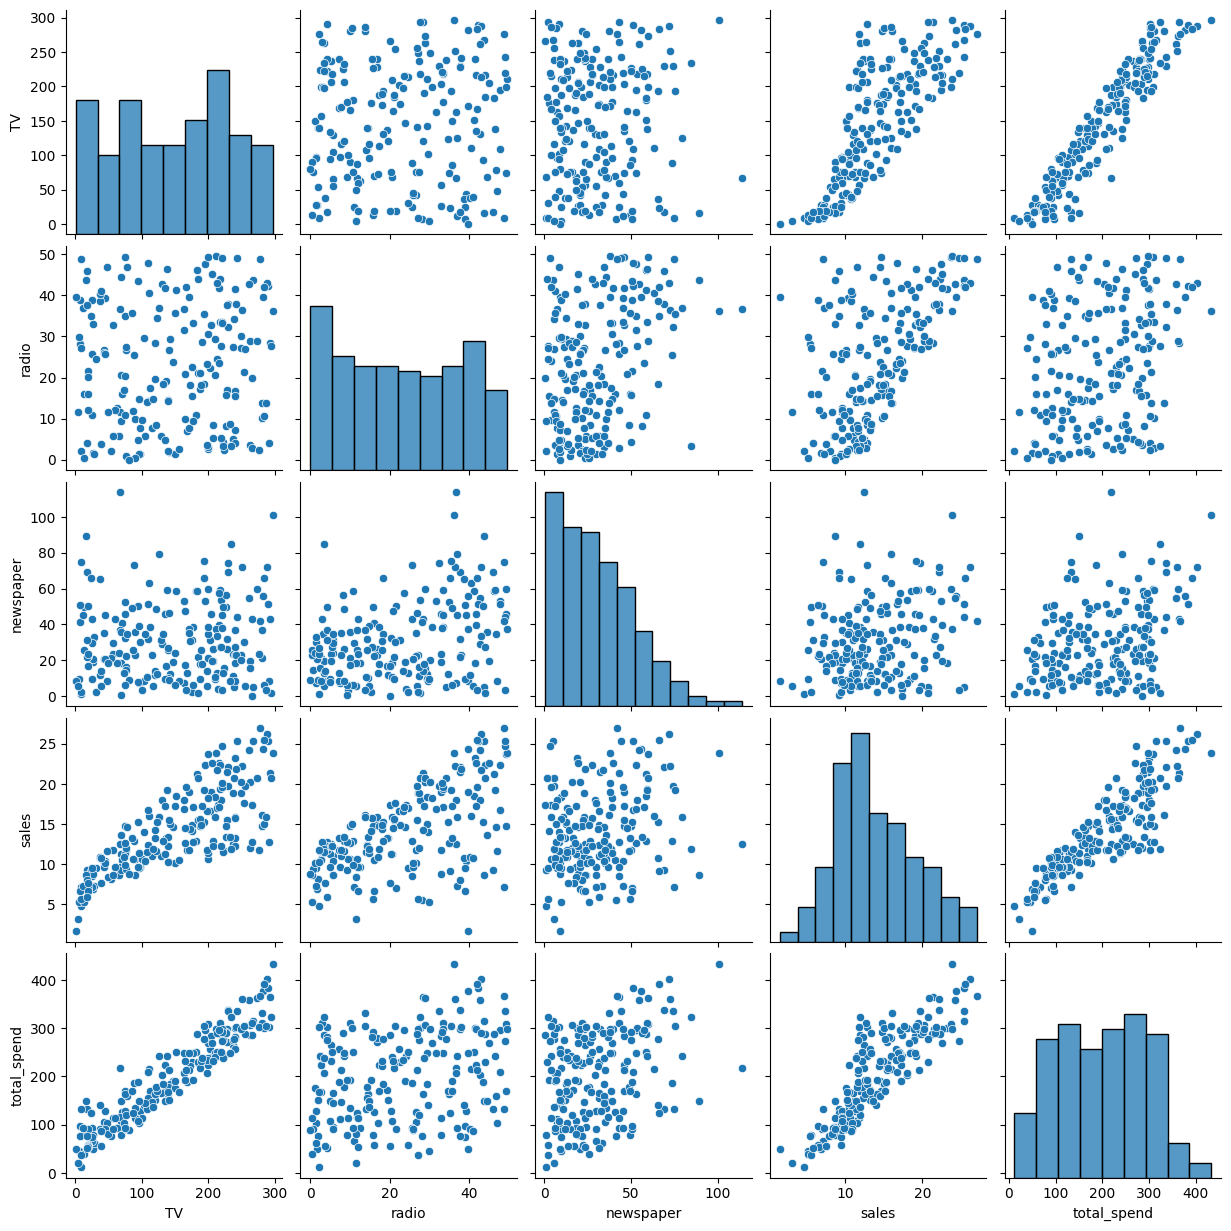

In [19]:
sns.pairplot(df)

In [20]:
X = df.drop('sales', axis=1)
y = df['sales']

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101) 

In [22]:
len(df)

200

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
model = LinearRegression()

model.fit(X_train, y_train)


LinearRegression()

In [25]:
test_predictions = model.predict(X_test)


<Axes: xlabel='sales', ylabel='Count'>

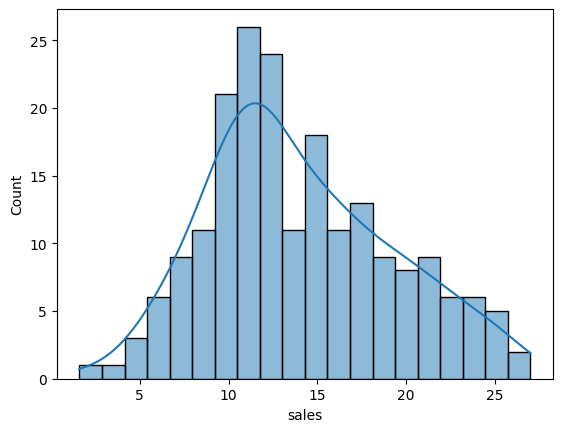

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

sns.histplot(data=df, x='sales', bins=20, kde=True)




In [27]:
mean_absolute_error(y_test, test_predictions)

1.2137457736144812

In [28]:
np.sqrt(mean_squared_error(y_test, test_predictions))

1.5161519375993897

In [29]:
test_residuals = y_test - test_predictions

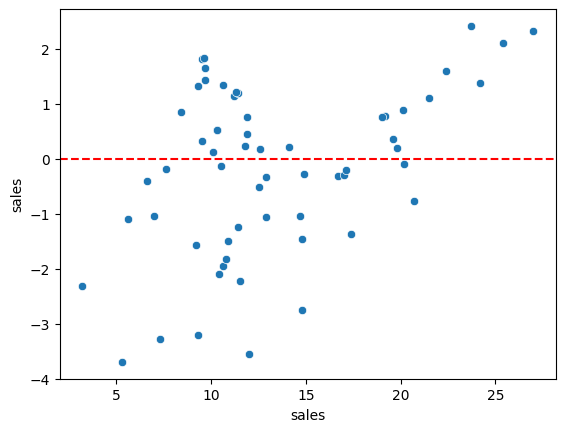

In [30]:
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='red', ls='--')

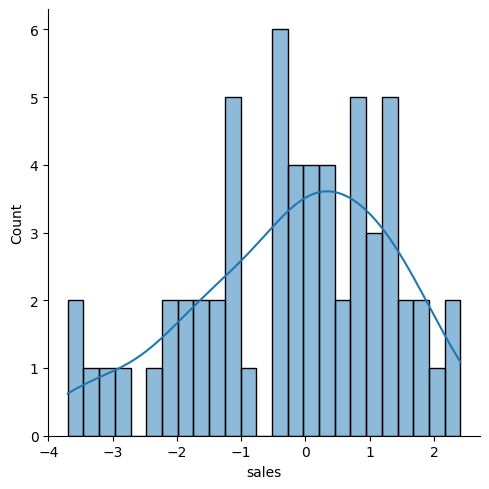

In [31]:
sns.displot(test_residuals, bins=25, kde=True)

In [32]:
import scipy as sp

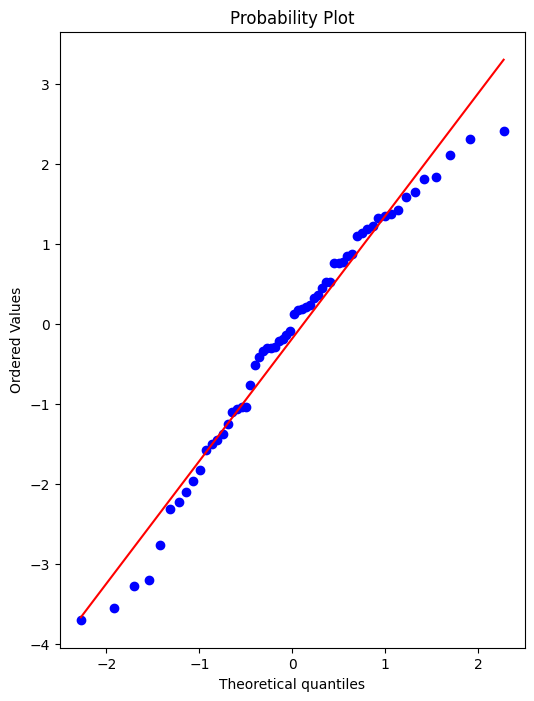

In [33]:
fig, ax = plt.subplots(figsize=(6,8), dpi=100)
_ = sp.stats.probplot(test_residuals, plot=ax)

In [35]:
final_model = LinearRegression()

In [36]:
final_model.fit(X, y)

LinearRegression()

In [37]:
final_model.coef_

array([-0.01254965,  0.13021572, -0.05935179,  0.05831429])

In [38]:
X.head()

,TV,radio,newspaper,total_spend
0,230.1,37.8,69.2,337.1
1,44.5,39.3,45.1,128.9
2,17.2,45.9,69.3,132.4
3,151.5,41.3,58.5,251.3
4,180.8,10.8,58.4,250.0


In [39]:
y_hat = final_model.predict(X)

In [40]:
from joblib import dump, load

In [41]:
dump(final_model, 'sales_model.joblib')

['sales_model.joblib']

In [42]:
loaded_model = load('sales_model.joblib')

In [43]:
campaign = [[149,22,12]]

loaded_model.predict(campaign)

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: X has 3 features, but LinearRegression is expecting 4 features as input.

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [44]:
df = pd.read_csv('Advertising.csv')

In [45]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [46]:
X = df.drop('sales', axis=1)

In [47]:
y = df['sales']

In [48]:
from sklearn.preprocessing import PolynomialFeatures

In [49]:
polynominal_converter = PolynomialFeatures(degree=2, include_bias=False)

In [50]:
polynominal_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [52]:
poly_features = polynominal_converter.transform(X)

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [54]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [55]:
model.fit(X_train, y_train)

LinearRegression()

In [56]:
test_predictions = model.predict(X_test)

In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(y_test, test_predictions)

MSE = mean_squared_error(y_test, test_predictions)

RMSE = np.sqrt(mean_squared_error(y_test, test_predictions))



In [61]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [62]:
trian_rmse_errors = []
test_rmse_errors = []

for d in range(1,10):
    polynomial_converter = PolynomialFeatures(degree=d, include_bias=False)
    polynomial_converter.fit(X)
    
    poly_features = polynomial_converter.transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_RMSE = np.sqrt(mean_squared_error(y_train, train_pred))
    test_RMSE = np.sqrt(mean_squared_error(y_test, test_pred))
    
    trian_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

In [63]:
trian_rmse_errors

[1.734594124329376,
 0.5879574085292231,
 0.43393443569020673,
 0.35170836883993456,
 0.25093429485505625,
 0.1946029158744245,
 5.421810463163666,
 0.14706200001184547,
 0.17939614315898797]

In [64]:
test_rmse_errors

[1.5161519375993877,
 0.6646431757268904,
 0.5803286825247139,
 0.5077742650960927,
 2.5758230801052475,
 4.3817132209093925,
 1378.9245965439227,
 3881.393002455024,
 94798.30871041381]

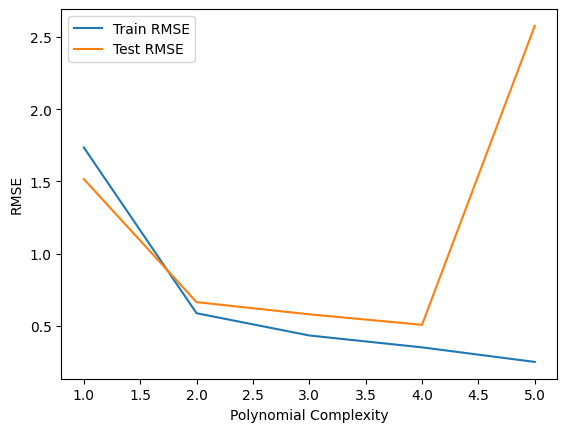

In [66]:
plt.plot(range(1,6), trian_rmse_errors[:5], label='Train RMSE')
plt.plot(range(1,6), test_rmse_errors[:5], label='Test RMSE')

plt.xlabel('Polynomial Complexity')
plt.ylabel('RMSE')
plt.legend()

In [67]:
final_poly_converter = PolynomialFeatures(degree=3, include_bias=False)

In [68]:
final_model = LinearRegression()

In [69]:
full_converted_X = final_poly_converter.fit_transform(X)
final_model.fit(full_converted_X, y)

LinearRegression()

In [70]:
dump(final_model, 'sales_poly_model.joblib')

['sales_poly_model.joblib']

In [71]:
dump(final_poly_converter, 'poly_converter.joblib')

['poly_converter.joblib']

In [73]:
loaded_converter = load('poly_converter.joblib')

In [74]:
loaded_model = load('sales_poly_model.joblib')

In [75]:
campaign = [[149,22,12]]

In [77]:
transform_data = loaded_model.predict(loaded_converter.transform(campaign))

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [78]:
loaded_model.predict(loaded_converter.transform(campaign))

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([14.64501014])

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [79]:
df = pd.read_csv('advertising.csv')

In [80]:
X = df.drop('sales', axis=1)

In [81]:
y = df['sales']

In [82]:
polynomial_converter = PolynomialFeatures(degree=3, include_bias=False)

In [83]:
poly_features = polynomial_converter.fit_transform(X)

In [84]:
poly_features.shape

(200, 19)

In [85]:
X_test, X_train, y_test, y_train = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [86]:
X_test.shape

(140, 19)

In [87]:
from sklearn.preprocessing import StandardScaler

In [88]:
scaler = StandardScaler()

In [89]:
scaler.fit(X_train)

StandardScaler()

In [90]:
X_train = scaler.transform(X_train)

In [91]:
X_test = scaler.transform(X_test)

In [92]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=10)

ridge_model.fit(X_train, y_train)

Ridge(alpha=10)

In [93]:
test_predictions = ridge_model.predict(X_test)

In [94]:
MAE = mean_absolute_error(y_test, test_predictions)

MSE = mean_squared_error(y_test, test_predictions)

RMSE = np.sqrt(mean_squared_error(y_test, test_predictions))

In [95]:
from sklearn.linear_model import RidgeCV

ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0), scoring='neg_mean_absolute_error')

In [96]:
ridge_cv_model.fit(X_train, y_train)

RidgeCV(scoring='neg_mean_absolute_error')

In [97]:

ridge_cv_model.alpha_

0.1

In [101]:
test_predictions = ridge_cv_model.predict(X_test)

In [102]:
MAE = mean_absolute_error(y_test, test_predictions)

MSE = mean_squared_error(y_test, test_predictions)

RMSE = np.sqrt(mean_squared_error(y_test, test_predictions))

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [104]:
from sklearn.linear_model import LassoCV

In [107]:
lasso_cv_model = LassoCV(eps=0.1, n_alphas=100, cv=5)

In [108]:
lasso_cv_model.fit(X_train, y_train)

LassoCV(cv=5, eps=0.1)

In [109]:
lasso_cv_model.alpha_

0.5124620370815695

In [110]:
test_predictions = lasso_cv_model.predict(X_test)

MAE = mean_absolute_error(y_test, test_predictions)

MSE = mean_squared_error(y_test, test_predictions)

RMSE = np.sqrt(mean_squared_error(y_test, test_predictions))

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [111]:
from sklearn.linear_model import ElasticNetCV

elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], cv=5, max_iter=100000)

elastic_model.fit(X_train, y_train)

elastic_model.l1_ratio_

elastic_model.alpha_


0.011152181717302404

In [112]:
test_predictions = elastic_model.predict(X_test)

MAE = mean_absolute_error(y_test, test_predictions)

MSE = mean_squared_error(y_test, test_predictions)

RMSE = np.sqrt(mean_squared_error(y_test, test_predictions))